In [2]:
!pip install palmerpenguins

In [106]:
# data set

import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
import numpy as np
import sklearn as sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import *
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
X = penguins.drop('species', axis = 1)

y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [40]:
# kNN Model and Pipeline - K value of 10

ct2 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


knn_pipeline = Pipeline(
  [("preprocessing", ct2),
  ("kNN", KNeighborsClassifier(n_neighbors = 10))]
).set_output(transform="pandas")

In [88]:
# Fit KNN Model
fitted_knn = knn_pipeline.fit(X,y)

# Predictions for test and training data
pred_kmtest = fitted_knn.predict(X_test)


# Confusion matrix
kncm = confusion_matrix(y_test, pred_kmtest)
kncm_df = pd.DataFrame(kncm, index=fitted_knn.classes_, columns=fitted_knn.classes_)
kncm_df = kncm_df.unstack().reset_index()
kncm_df.columns = ['Predicted', 'True', 'Count']

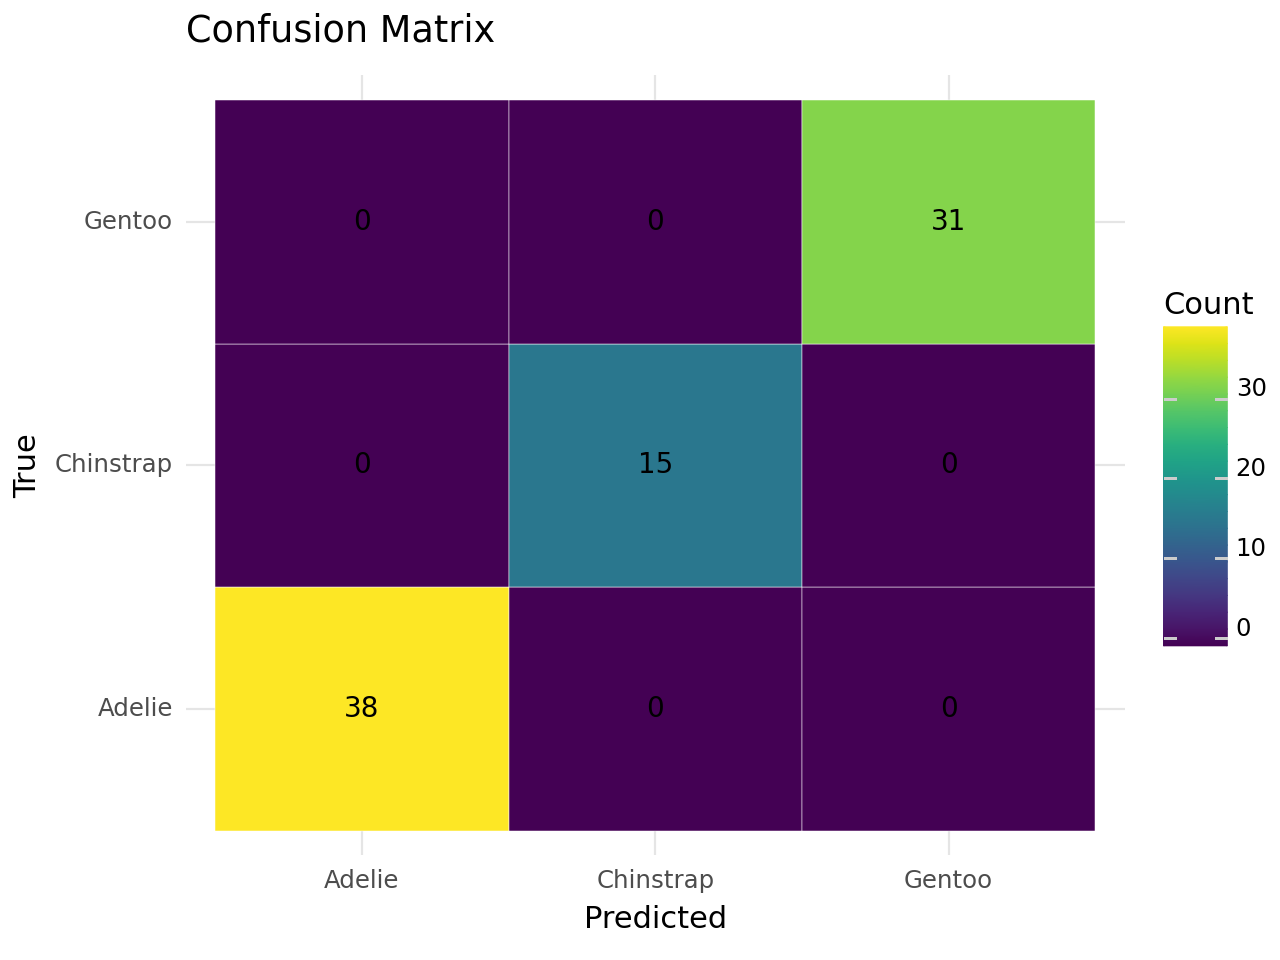

<Figure Size: (640 x 480)>

In [89]:
# Plot confusion matrix using plotnine
(
    ggplot(kncm_df, aes(x='Predicted', y='True', fill='Count')) +
    geom_tile(color='white') +
    geom_text(aes(label='Count'), size=10, color='black') +
    labs(title='Confusion Matrix', x='Predicted', y='True') +
    theme_minimal()
)

In [47]:
# Precision, Recall, F1-score
classification_report(y_test, pred_kmtest)

'              precision    recall  f1-score   support\n\n      Adelie       1.00      1.00      1.00        38\n   Chinstrap       1.00      1.00      1.00        15\n      Gentoo       1.00      1.00      1.00        31\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [48]:
# Auc
prob = fitted_knn.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class='ovr') # ovr stands for one-vs-rest
# ovr computes AUC of each class against the rest

1.0

In [91]:
# kNN Model and Pipeline 2 - K value of 50

ct3 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


knn_pipeline_2 = Pipeline(
  [("preprocessing", ct3),
  ("kNN", KNeighborsClassifier(120))]
).set_output(transform="pandas")

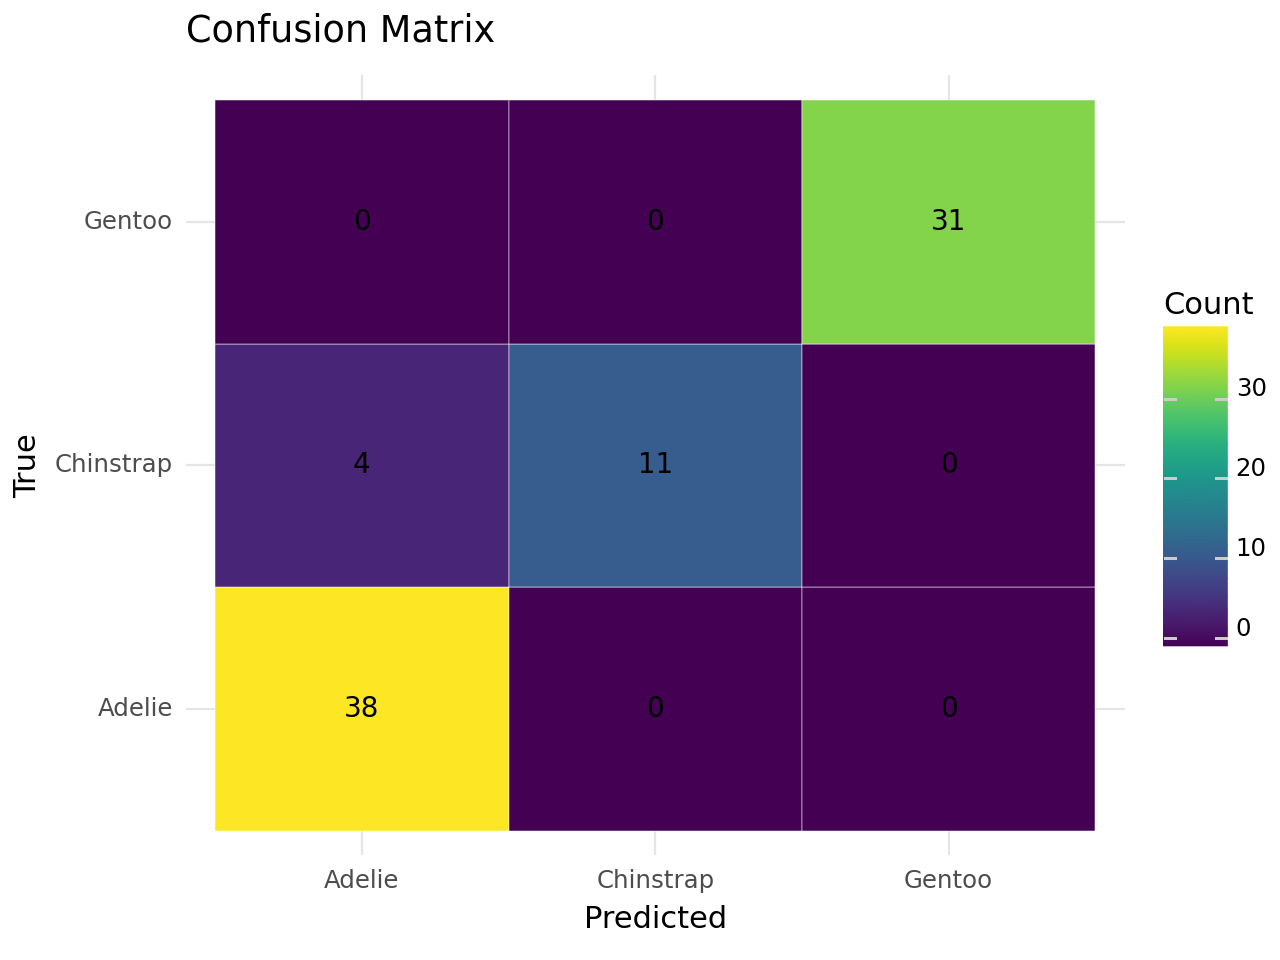

<Figure Size: (640 x 480)>

In [92]:
# Fit KNN2 Model
fitted_knn2 = knn_pipeline_2.fit(X,y)

# Predictions for test and training data
pred_kmtest2 = fitted_knn2.predict(X_test)


# Confusion matrix
kncm2 = confusion_matrix(y_test, pred_kmtest2)

kncm_df2 = pd.DataFrame(kncm2, index=fitted_knn2.classes_, columns=fitted_knn2.classes_)
kncm_df2 = kncm_df2.unstack().reset_index()
kncm_df2.columns = ['Predicted', 'True', 'Count']

# Plot confusion matrix using plotnine
(
    ggplot(kncm_df2, aes(x='Predicted', y='True', fill='Count')) +
    geom_tile(color='white') +
    geom_text(aes(label='Count'), size=10, color='black') +
    labs(title='Confusion Matrix', x='Predicted', y='True') +
    theme_minimal()
)

In [62]:
# Precision, Recall, F1-score
classification_report(y_test, pred_kmtest2)

'              precision    recall  f1-score   support\n\n      Adelie       0.90      1.00      0.95        38\n   Chinstrap       1.00      0.73      0.85        15\n      Gentoo       1.00      1.00      1.00        31\n\n    accuracy                           0.95        84\n   macro avg       0.97      0.91      0.93        84\nweighted avg       0.96      0.95      0.95        84\n'

In [63]:
# Auc
prob = fitted_knn2.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class='ovr')

1.0

In [94]:
# Decision Tree Model and Pipeline - alpha value of 10

ct4 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


dt_pipeline = Pipeline(
  [("preprocessing", ct4),
  ("decision_tree", DecisionTreeClassifier(ccp_alpha = 10))]
).set_output(transform="pandas")

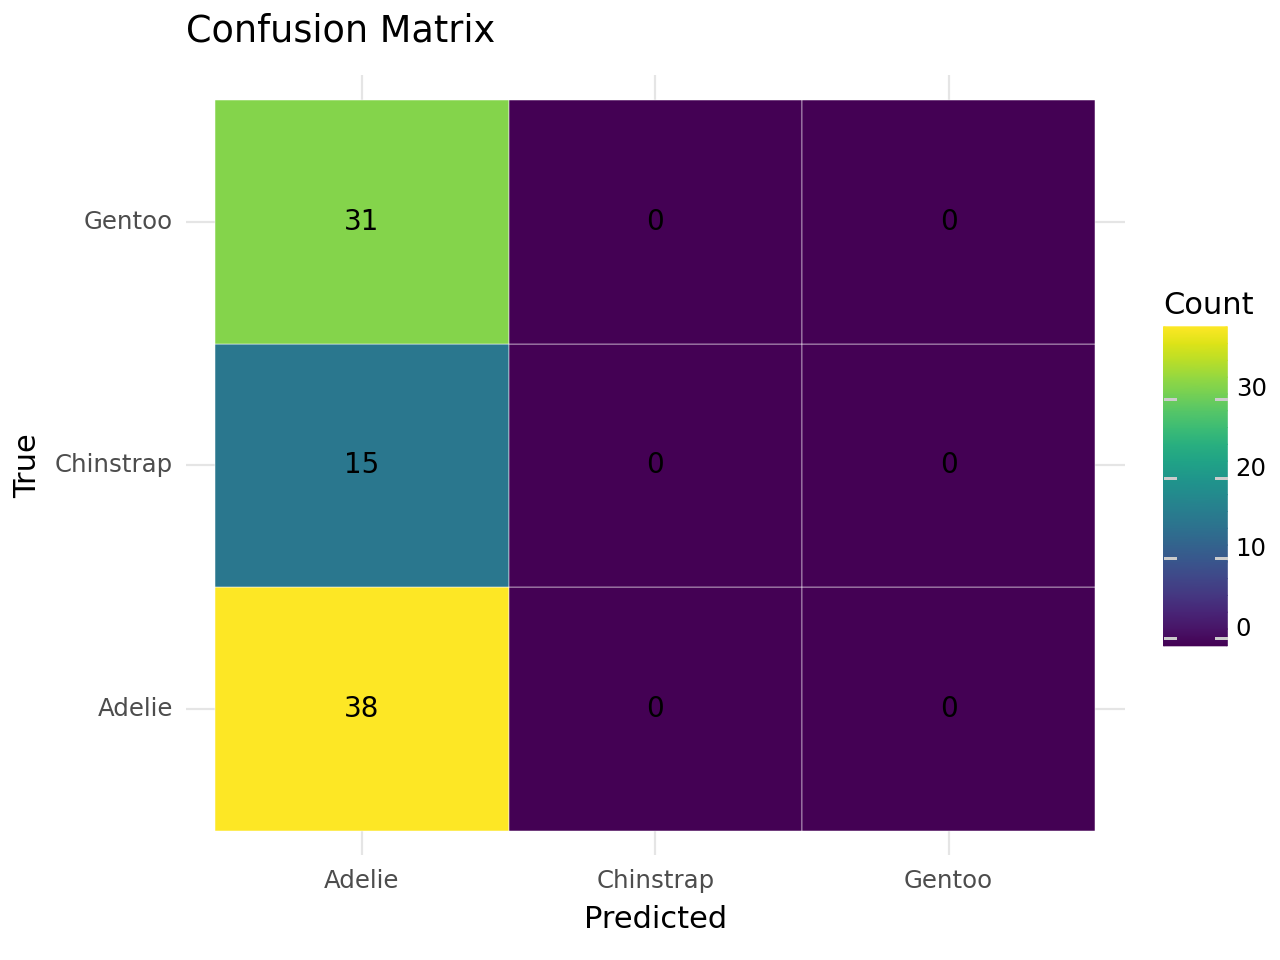

<Figure Size: (640 x 480)>

In [95]:
# Fit Decision Tree Model
fitted_dt = dt_pipeline.fit(X,y)

# Predictions for test and training data
pred_dttest = fitted_dt.predict(X_test)



# Confusion matrix
dtcm = confusion_matrix(y_test, pred_dttest)


dtcm_df = pd.DataFrame(dtcm, index=fitted_dt.classes_, columns=fitted_dt.classes_)
dtcm_df = dtcm_df.unstack().reset_index()
dtcm_df.columns = ['Predicted', 'True', 'Count']

# Plot confusion matrix using plotnine
(
    ggplot(dtcm_df, aes(x='Predicted', y='True', fill='Count')) +
    geom_tile(color='white') +
    geom_text(aes(label='Count'), size=10, color='black') +
    labs(title='Confusion Matrix', x='Predicted', y='True') +
    theme_minimal()
)

In [74]:
# Precision, Recall, F1-score
classification_report(y_test, pred_dttest)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n      Adelie       0.45      1.00      0.62        38\n   Chinstrap       0.00      0.00      0.00        15\n      Gentoo       0.00      0.00      0.00        31\n\n    accuracy                           0.45        84\n   macro avg       0.15      0.33      0.21        84\nweighted avg       0.20      0.45      0.28        84\n'

In [108]:
# Auc
prob = fitted_dt.predict_proba(X_test)
dtr = roc_auc_score(y_test, prob, multi_class='ovr')

In [76]:
# Decision Tree Model and Pipeline 2 - alpha value of 1000

ct5 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


dt_pipeline2 = Pipeline(
  [("preprocessing", ct5),
  ("decision_tree", DecisionTreeClassifier(ccp_alpha = 1000))]
).set_output(transform="pandas")

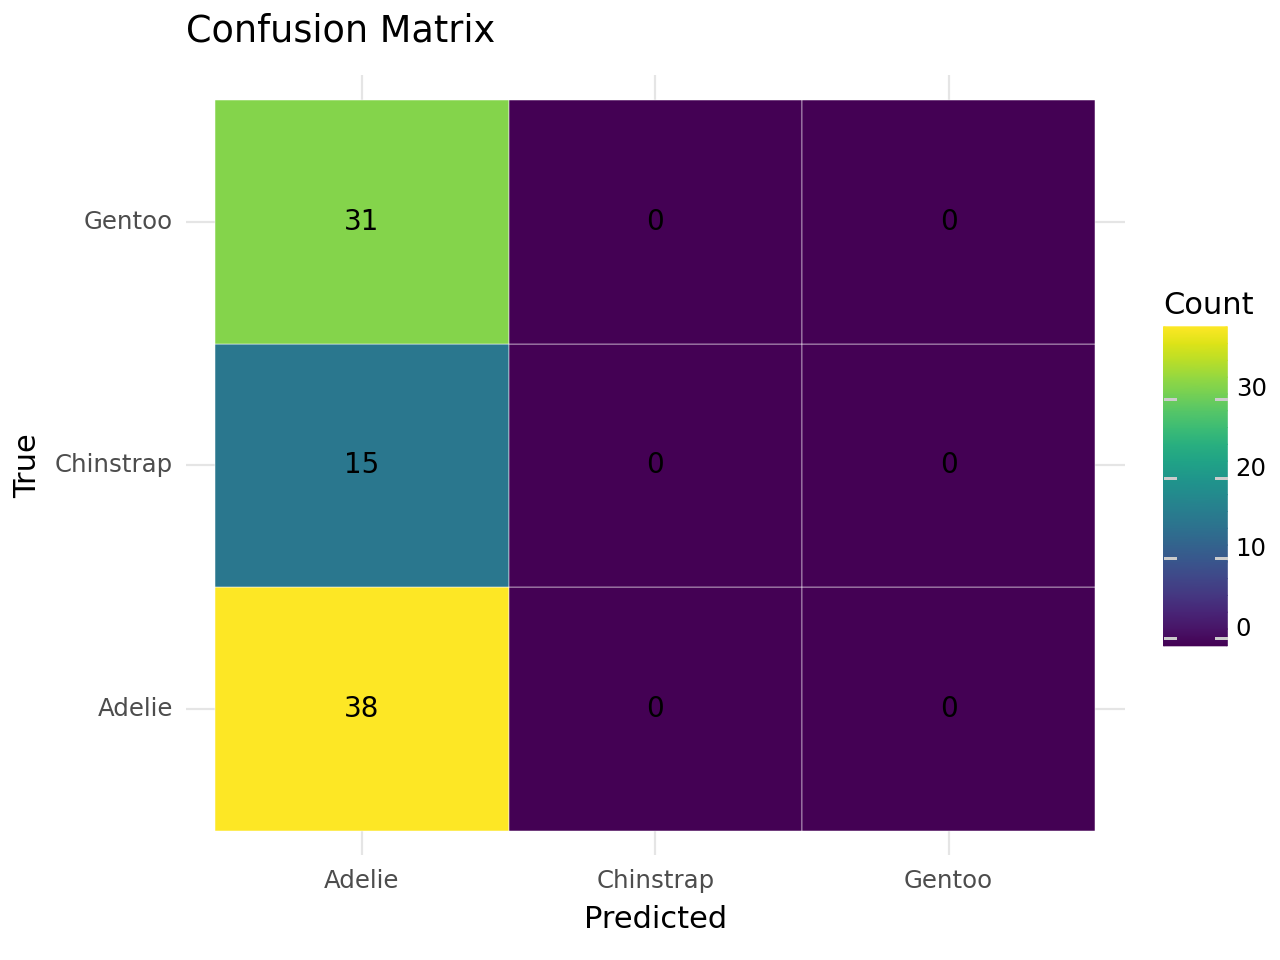

<Figure Size: (640 x 480)>

In [97]:
# Fit Decision Tree Model 2
fitted_dt2 = dt_pipeline2.fit(X,y)

# Predictions for test and training data
pred_dttest2 = fitted_dt2.predict(X_test)


# Confusion matrix
dtcm2 = confusion_matrix(y_test, pred_dttest2)

dtcm_df2 = pd.DataFrame(dtcm2, index=fitted_dt2.classes_, columns=fitted_dt2.classes_)
dtcm_df2 = dtcm_df2.unstack().reset_index()
dtcm_df2.columns = ['Predicted', 'True', 'Count']

# Plot confusion matrix using plotnine
(
    ggplot(dtcm_df2, aes(x='Predicted', y='True', fill='Count')) +
    geom_tile(color='white') +
    geom_text(aes(label='Count'), size=10, color='black') +
    labs(title='Confusion Matrix', x='Predicted', y='True') +
    theme_minimal()
)

In [105]:
# Precision, Recall, F1-score

report = classification_report(y_test, pred_dttest2)
report

recall_score
#pd.DataFrame(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


'              precision    recall  f1-score   support\n\n      Adelie       0.45      1.00      0.62        38\n   Chinstrap       0.00      0.00      0.00        15\n      Gentoo       0.00      0.00      0.00        31\n\n    accuracy                           0.45        84\n   macro avg       0.15      0.33      0.21        84\nweighted avg       0.20      0.45      0.28        84\n'

In [80]:
# Auc
prob = fitted_dt2.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class='ovr')

0.5

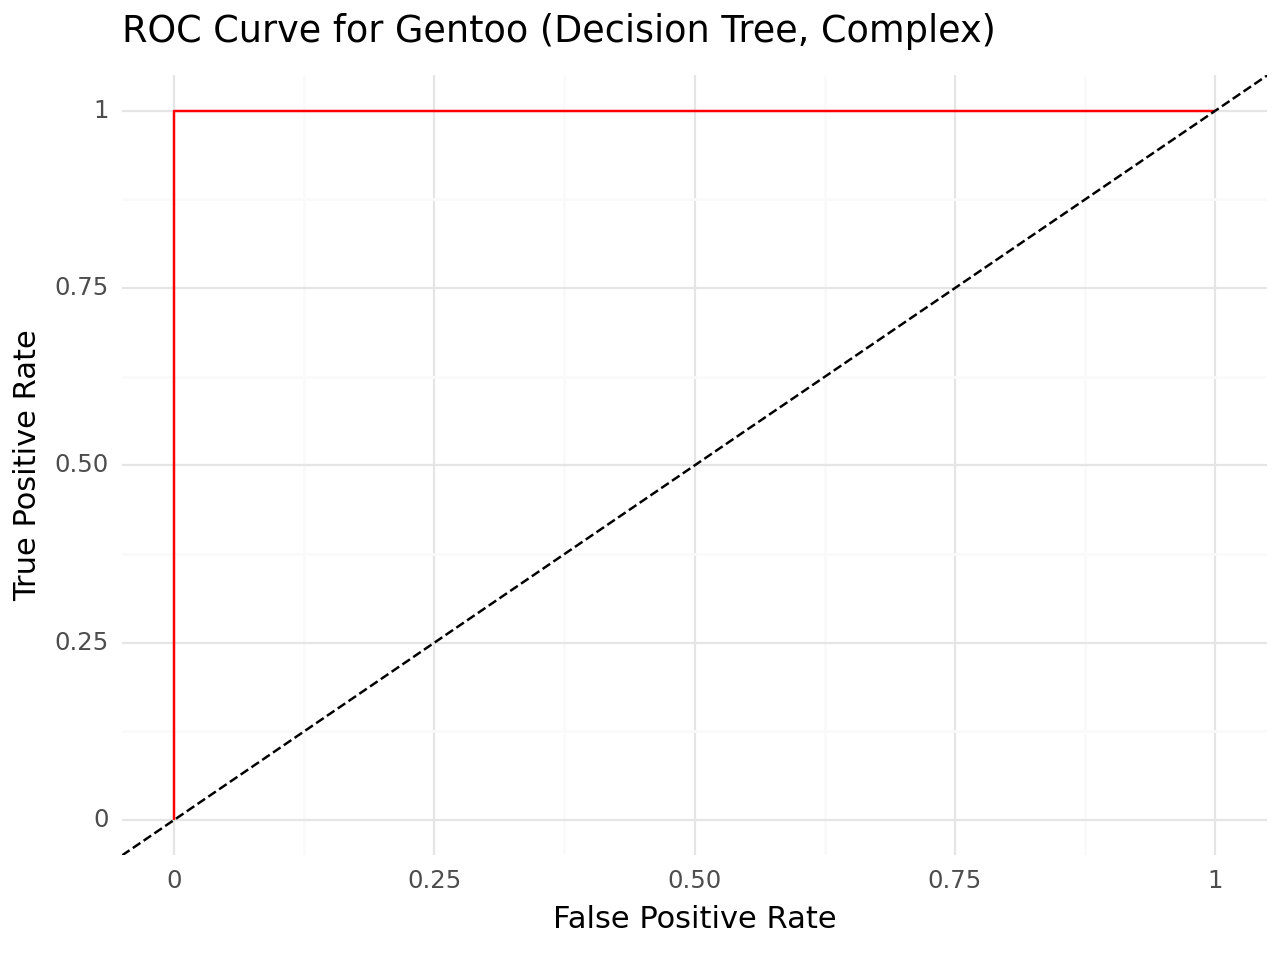

<Figure Size: (640 x 480)>

In [109]:
from sklearn.preprocessing import label_binarize
class_names = ["Adelie", "Chinstrap", "Gentoo"]
# Binarize y_test for 'Gentoo' class
y_test_binarized_gentoo = label_binarize(y_test, classes=class_names)[:, class_names.index('Adelie')]

# Predict probabilities for the 'Gentoo' class
y_test_pred_proba_gentoo = fitted_knn.predict_proba(X_test)[:, class_names.index('Adelie')]


# Calculate ROC curve metrics for 'Gentoo' class
fpr_gentoo, tpr_gentoo, thresholds_gentoo = roc_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

# Convert to DataFrame for plotting
roc_data_gentoo = pd.DataFrame({
    'False Positive Rate': fpr_gentoo,
    'True Positive Rate': tpr_gentoo
})

# Create ROC plot using plotnine
roc_plot_gentoo = (
    ggplot(roc_data_gentoo, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line(color = "red")
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Gentoo (Decision Tree, Complex)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

roc_plot_gentoo